<a href="https://colab.research.google.com/github/nsbssnmw/dkdkd/blob/main/Smiling_or_Not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pwd

'/content'

In [ ]:
ls

drive/  sample_data/


In [ ]:
cd /content/drive/MyDrive/archive

/content/drive/MyDrive/archive


In [ ]:
ls

non_smile/  smile/


Text(0.5, 1.0, 'not')

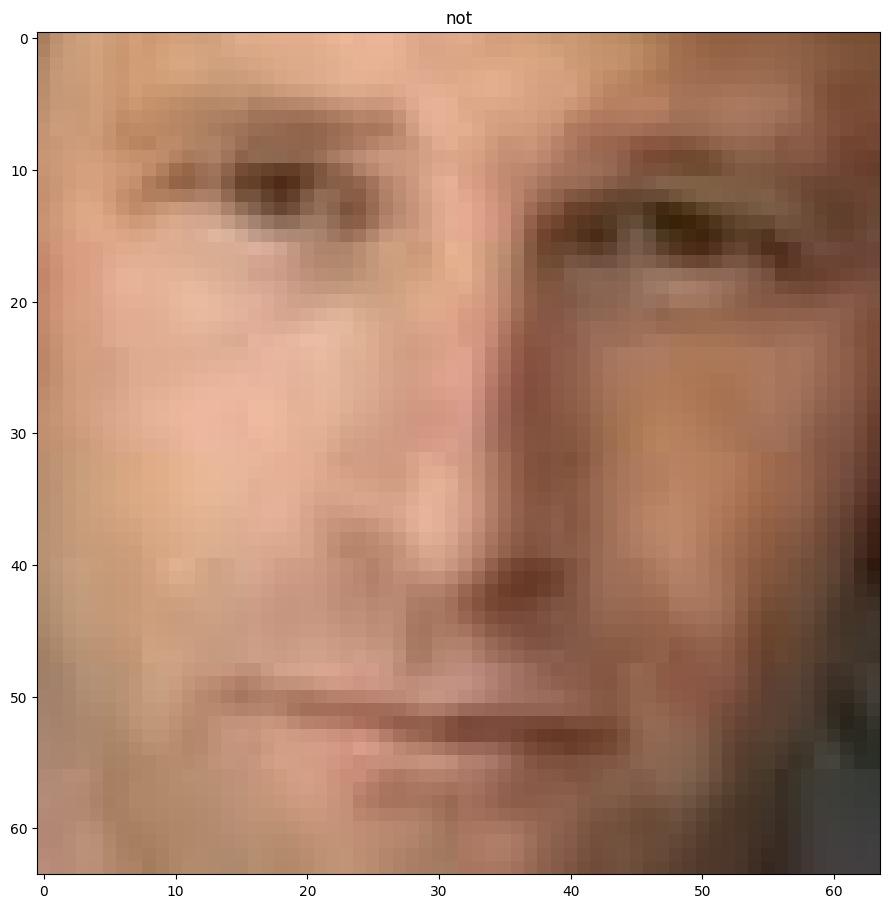

In [ ]:
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt




image_sample= imread('/content/drive/MyDrive/archive/non_smile/Aaron_Eckhart_0001.jpg')
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_sample, ax=ax)
ax.set_title('not')

Text(0.5, 1.0, 'Smile')

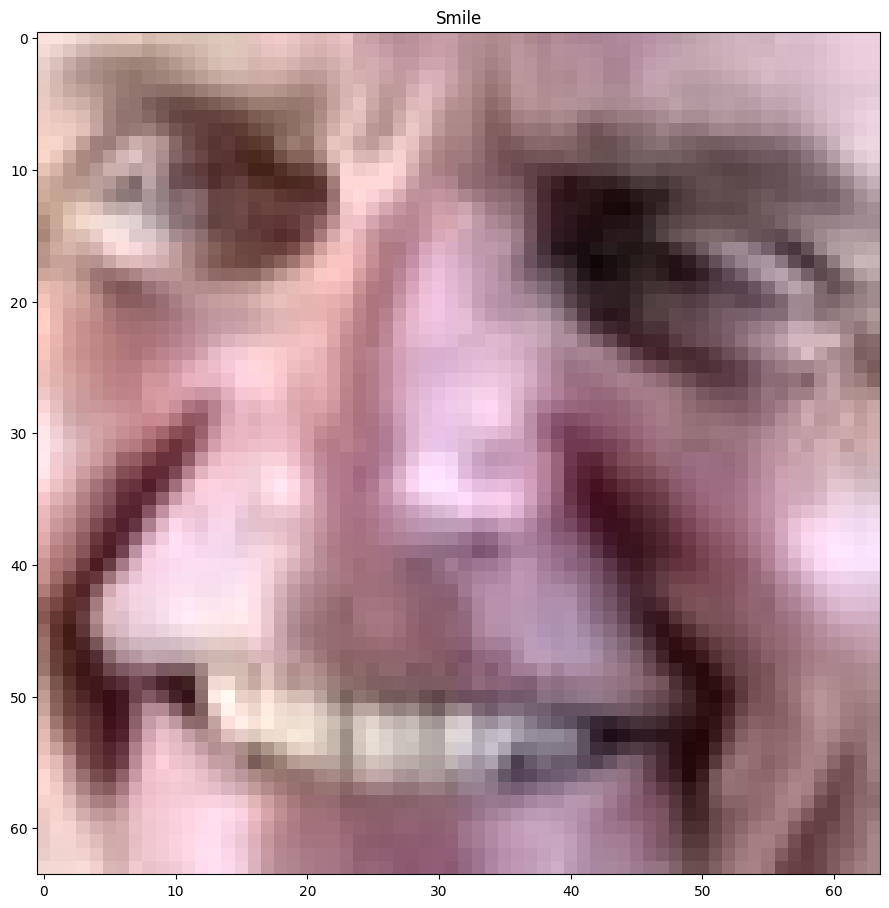

In [ ]:
image_sample2= imread('/content/drive/MyDrive/archive/smile/James_Jones_0001.jpg')
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_sample2, ax=ax)
ax.set_title('Smile')

In [ ]:
image_sample2.shape

(64, 64, 3)

In [ ]:
cd /

/


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam






train_gen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
    )



train = train_gen.flow_from_directory(directory='../content/drive/MyDrive/archive',
                                              target_size=(160, 185),
                                              color_mode='rgb',
                                              class_mode='categorical',
                                              batch_size=20,
                                              shuffle=True)



valid_gen = ImageDataGenerator(
        rescale=1./255
    )


test = valid_gen.flow_from_directory(directory='../content/drive/MyDrive/archive',
                                              target_size=(160, 185),
                                              color_mode='rgb',
                                              class_mode='categorical',
                                              batch_size=3,
                                              shuffle=True)

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(160, 185, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

model.fit_generator(train, validation_data = test, epochs=5 )


Found 1203 images belonging to 2 classes.
Found 1203 images belonging to 2 classes.


<ipython-input-10-2862787fa973>:60: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train, validation_data = test, epochs=5 )


Epoch 1/5
10/61 [===>..........................] - ETA: 1:34 - loss: 6.7633 - accuracy: 0.4800

KeyboardInterrupt: ignored